In [2]:
t = (['A','B','C'], ['D','E','F'], ['G','H','I'])

In [3]:
t[0] = ['X','Y','Z'] # immutable

TypeError: 'tuple' object does not support item assignment

In [5]:
t[0][0] = 'X' # tuple is immutable but list inside tuple is mutable
t

(['X', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'])

## Stack
- O(1) 연산

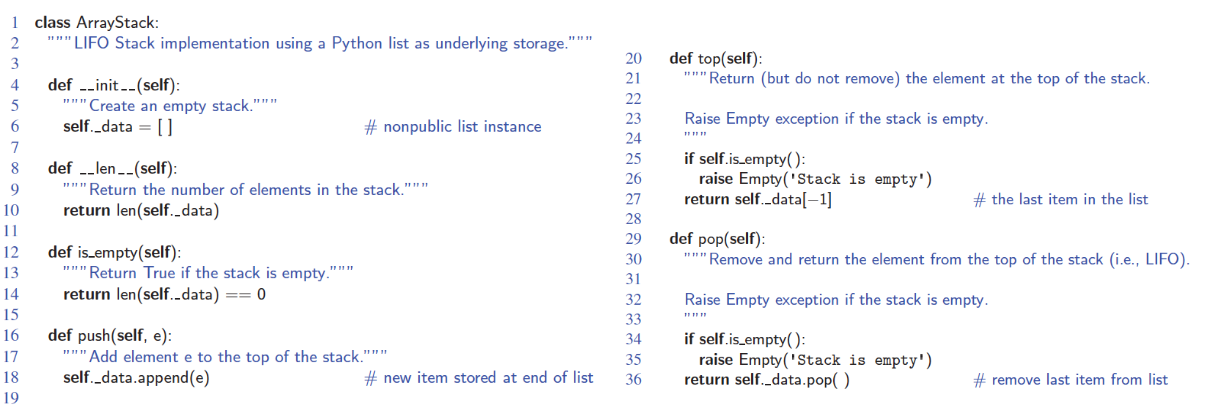
퀴즈

In [2]:
def push(stack, item):
    stack.append(item)
    return stack
def pop(stack):
    return stack.pop()
def is_empty(stack):
    return len(stack) == 0
stack = []
push(stack, 1)
push(stack, 2)
push(stack, 3)
print(stack)
print(pop(stack))
print(pop(stack))
print(pop(stack))
print(is_empty(stack))

[1, 2, 3]
3
2
1
True
